In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import pickle

In [2]:
dataset = pd.read_csv('../data/agricultural_exports.csv')

y = dataset.pop('Agricultural.raw.materials.exports').values.astype(float)
dataset.pop('year')
dataset.pop('iso3')

X = dataset.values.astype(float)

X_train, X_testval, y_train, y_testval = train_test_split(X, y, test_size=0.4, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_testval, y_testval, test_size=0.5, random_state=0)
with open('../data/agricultural_exports.pkl', 'wb') as f:
    pickle.dump((
        X, y, X_train, X_test, X_val, y_train, y_test, y_val
    ), f)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=0)
rf_reg.fit(X_train, y_train)

# XGBoost Regressor
xgb_reg = xgb.XGBRegressor(n_estimators=100)
xgb_reg.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_reg.predict(X_test)
y_pred_rf = rf_reg.predict(X_test)
y_pred_xgb = xgb_reg.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared (R²)
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_linear = r2_score(y_test, y_pred_linear)
r2_rf = r2_score(y_test, y_pred_rf)
r2_xgb = r2_score(y_test, y_pred_xgb)

Linear Regression:
MSE:  6.214156340400046e+18
R²:  0.17683889829481658

Random Forest Regression:
MSE:  2.0496212100701468e+18
R²:  0.7284959758107664

XGBoost:
MSE:  2.3370538528432543e+18
R²:  0.6904210774769547


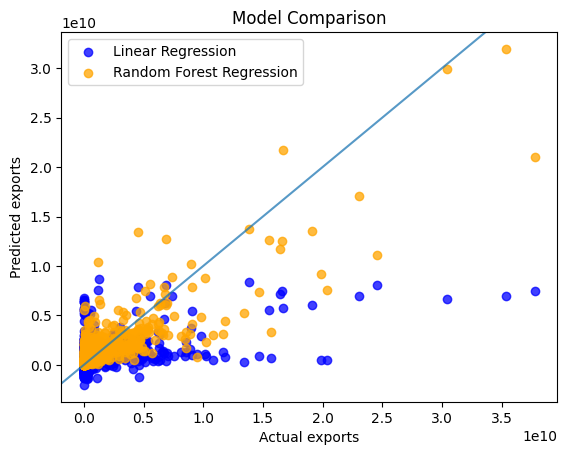

In [3]:
print("Linear Regression:")
print("MSE: ", mse_linear)
print("R²: ", r2_linear)

print("\nRandom Forest Regression:")
print("MSE: ", mse_rf)
print("R²: ", r2_rf)

print("\nXGBoost:")
print("MSE: ", mse_xgb)
print("R²: ", r2_xgb)

# Plot the results
plt.scatter(y_test, y_pred_linear, label='Linear Regression', color='blue', alpha=0.75)
plt.scatter(y_test, y_pred_rf, label='Random Forest Regression', color='orange', alpha=0.75)
# plt.scatter(y_test, y_pred_xgb, label='XGBoost', color='purple', alpha=0.75)
plt.axline((0, 0), slope=1, alpha=0.75)
plt.xlabel("Actual exports")
plt.ylabel("Predicted exports")
plt.legend()
plt.title("Model Comparison")
plt.show()